In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

from Timer import Timer
from file_utils import read_lines_tsv

In [2]:
# Loading dataset from file
    # source: https://graphchallenge.mit.edu/data-sets
    # file_source: https://graphchallenge.s3.amazonaws.com/snap/roadNet-CA/roadNet-CA_adj.tsv
    # file_format: Adjacency TSV (Tab-Separated Values)
        # <dataset-name>_adj.tsv
        # (Row, Col, Value) tuple describing the adjacency matrix of the graph in tab separated format.
        # Adjacency matrix is of size Num_vertices x Num_vertices
    # file: roadNet-CA_adj.tsv (Road network of California)
    # num of nodes:     1.965.206
    # num of edges:     5.533.214
    # num of triangles:   120.676
    
Timer.start()
    
G = nx.read_edgelist('../datasets/roadNet-CA_adj.tsv', data=(('ajd_value',float),))
print(nx.info(G))

Timer.finish()

Name: 
Type: Graph
Number of nodes: 1965206
Number of edges: 2766607
Average degree:   2.8156
elapsed time: 21.587979


In [3]:
# Alternative way to build graphs from file
# This will allow to generate random samples of graphs from a list of edges in memory

Timer.start()
lines = read_lines_tsv('../datasets/roadNet-CA_adj.tsv')
elapsed = Timer.get_elapsed()
print ('elapsed time to read file: %f' % elapsed)

Timer.start()
G = nx.parse_edgelist(lines, nodetype = int, data=(('ajd_value',float),))
elapsed = Timer.get_elapsed()
print ('elapsed time to build graph in memory: %f' % elapsed)

Timer.start()
print(nx.info(G))
elapsed = Timer.get_elapsed()
print ('elapsed time to print info: %f' % elapsed)

Timer.start()
print(('Number of lines: %s') % len(lines))
elapsed = Timer.get_elapsed()
print ('elapsed time to calculate length of list in memory: %f' % elapsed)

elapsed time to read file: 1.131467
elapsed time to build graph in memory: 18.495002
Name: 
Type: Graph
Number of nodes: 1965206
Number of edges: 2766607
Average degree:   2.8156
elapsed time to print info: 1.094151
Number of lines: 5533214
elapsed time to calculate length of list in memory: 0.000047


In [4]:
Timer.start()
print('Number of nodes: ', G.number_of_nodes())
Timer.finish()

Timer.start()
print('Number of edges: ', G.number_of_edges())
Timer.finish()

Timer.start()
# each triangle is counted 3 times then divided by 3
print('Number of triangles: ', int(sum(list(nx.triangles(G).values()))/3))
Timer.finish()

Timer.start()
# clustering coefficient of G
cc = nx.average_clustering(G)
print('Clustering coefficient of G: ', cc)
Timer.finish()

Number of nodes:  1965206
elapsed time: 0.000144
Number of edges:  2766607
elapsed time: 0.526503
Number of triangles:  120676
elapsed time: 18.242413
Clustering coefficient of G:  0.04637027007475698
elapsed time: 18.453052


In [5]:
# Using samples to build graphs and to calculate 

m, ccGraph, ccSample, ccSubG = [], [], [], []
sampleG, subG = nx.Graph(), nx.Graph()

for i in range(220000, len(lines)+1, 220000):
    Timer.start()
    
    sampleG.clear() # our sample graph
    subG.clear()    # a subgraph from complete graph
    sample = np.random.choice(lines, i, replace=False) # getting edges from list with random choice
    sampleG = nx.parse_edgelist(sample, nodetype = int, data=(('ajd_value',float),))
    # creating a subgraph of G using nodes of the sample graph
    subG = G.subgraph(sampleG.nodes).copy()
    nnSampleG = sampleG.number_of_nodes()
    nnSubG = subG.number_of_nodes()
    m.append(nnSampleG)
    ccGraph.append(cc) # clustering coefficient of entire graph G
    ccSample.append(nx.average_clustering(sampleG))
    ccSubG.append(nx.average_clustering(subG))
    
    elapsed = Timer.get_elapsed()
    print('Elapsed time for %d lines : %f, nnSampleG: %d, nnSubG: %d' % (i, elapsed, nnSampleG, nnSubG))

Elapsed time for 220000 lines : 14.089077, nnSampleG: 396379, nnSubG: 396379
Elapsed time for 440000 lines : 22.048126, nnSampleG: 714988, nnSubG: 714988
Elapsed time for 660000 lines : 30.520270, nnSampleG: 970944, nnSubG: 970944
Elapsed time for 880000 lines : 38.951093, nnSampleG: 1176151, nnSubG: 1176151
Elapsed time for 1100000 lines : 45.505554, nnSampleG: 1339348, nnSubG: 1339348
Elapsed time for 1320000 lines : 52.753007, nnSampleG: 1469028, nnSubG: 1469028
Elapsed time for 1540000 lines : 57.717195, nnSampleG: 1572129, nnSubG: 1572129
Elapsed time for 1760000 lines : 62.248269, nnSampleG: 1651955, nnSubG: 1651955
Elapsed time for 1980000 lines : 65.676182, nnSampleG: 1716579, nnSubG: 1716579
Elapsed time for 2200000 lines : 71.673502, nnSampleG: 1767501, nnSubG: 1767501
Elapsed time for 2420000 lines : 72.069369, nnSampleG: 1807875, nnSubG: 1807875
Elapsed time for 2640000 lines : 76.967489, nnSampleG: 1840105, nnSubG: 1840105
Elapsed time for 2860000 lines : 78.966571, nnSamp

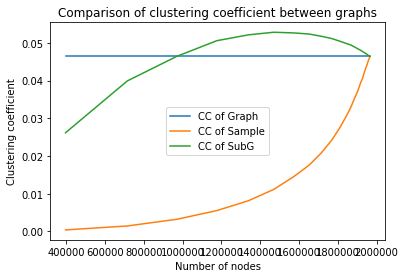

In [6]:
plt.plot(m, ccGraph, label='CC of Graph')
plt.plot(m, ccSample, label='CC of Sample')
plt.plot(m, ccSubG, label='CC of SubG')
plt.legend()
plt.title('Comparison of clustering coefficient between graphs')
plt.xlabel('Number of nodes')
plt.ylabel('Clustering coefficient')
plt.show()

# Random Walk

In [7]:
# initializing
step, ccGraph, ccSubG = [], [], []
subG = nx.Graph()
visited = set()

# Let's walk k steps
k = G.number_of_nodes() * 6

# To control the point of plotting
j = 0
checkpoint = 220000

# starting random
idNode = np.random.choice(G.nodes, 1)[0]
visited.add(idNode)

for i in range(k):
    neighbors = [n for n in G.neighbors(idNode)]
    idNode = np.random.choice(neighbors, 1)[0]
    visited.add(idNode)
    j = j + 1
    if(j == checkpoint):
        j = 0
        subG.clear()
        subG = G.subgraph(visited).copy()
        nnSubG = subG.number_of_nodes()
        step.append(i)
        ccGraph.append(cc) # clustering coefficient of entire graph G
        ccSubG.append(nx.average_clustering(subG))
        print('Number of nodes in %d steps: %d' % (i+1, nnSubG))

Number of nodes in 220000 steps: 26115
Number of nodes in 440000 steps: 48039
Number of nodes in 660000 steps: 66930
Number of nodes in 880000 steps: 86013
Number of nodes in 1100000 steps: 106452
Number of nodes in 1320000 steps: 124603
Number of nodes in 1540000 steps: 130794
Number of nodes in 1760000 steps: 153027
Number of nodes in 1980000 steps: 159709
Number of nodes in 2200000 steps: 168648
Number of nodes in 2420000 steps: 176341
Number of nodes in 2640000 steps: 188765
Number of nodes in 2860000 steps: 216775
Number of nodes in 3080000 steps: 240411
Number of nodes in 3300000 steps: 263748
Number of nodes in 3520000 steps: 284417
Number of nodes in 3740000 steps: 287913
Number of nodes in 3960000 steps: 300895
Number of nodes in 4180000 steps: 309181
Number of nodes in 4400000 steps: 314640
Number of nodes in 4620000 steps: 321584
Number of nodes in 4840000 steps: 337143
Number of nodes in 5060000 steps: 358672
Number of nodes in 5280000 steps: 384230
Number of nodes in 55000

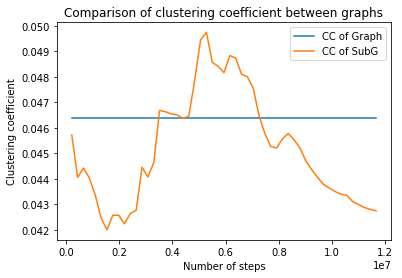

In [8]:
# plot
plt.plot(step, ccGraph, label='CC of Graph')
plt.plot(step, ccSubG, label='CC of SubG')
plt.legend()
plt.title('Comparison of clustering coefficient between graphs')
plt.xlabel('Number of steps')
plt.ylabel('Clustering coefficient')
plt.show()